In [1]:
%matplotlib inline

In [8]:
import sys
import numpy as np
import os
import matplotlib.pyplot as plt


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

In [13]:
use_pretrained_model = False
pretrained_model_name = ""

In [3]:
train_data = np.load('workdir/train_tr_MFCC_0_D_A_norm_data.npy')
train_labels = np.load('workdir/train_tr_MFCC_0_D_A_norm_labels.npy')
val_data = np.load('workdir/train_va_MFCC_0_D_A_norm_data.npy')
val_labels = np.load('workdir/train_va_MFCC_0_D_A_norm_labels.npy')
test_data = np.load('workdir/test_MFCC_0_D_A_norm_data.npy')
test_labels = np.load('workdir/test_MFCC_0_D_A_norm_labels.npy')

print("Shape of training, validation and test data and corresponding labels")
for data, labels in [(train_data, train_labels), (val_data, val_labels), (test_data, test_labels)]:
    print(data.shape, labels.shape)

Shape of training, validation and test data and corresponding labels
(13, 3, 13, 1359661) (1359661,)
(13, 3, 13, 147731) (147731,)
(13, 3, 13, 1527014) (1527014,)


In [4]:
print(np.unique(train_labels))
print(len(np.unique(train_labels)))
nb_classes = len(np.unique(train_labels))
y_train_asd = np.array(train_labels) 
#y_test = np.array(y_test)
Y_train_asd = np_utils.to_categorical(y_train_asd, nb_classes)
#Y_test = np_utils.to_categorical(y_test, nb_classes)
print(Y_train_asd.shape)
print(train_labels[0])
print(Y_train_asd[0])

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.]
64
(1359661, 64)
42.0
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


#### Change order of columns

In [6]:
print(train_data.shape)
X_train = np.transpose(train_data, (3, 0, 2, 1))
Y_train_num = train_labels
X_val = np.transpose(val_data, (3, 0, 2, 1))
Y_val_num = val_labels
X_test = np.transpose(test_data, (3, 0, 2, 1))
Y_test_num = test_labels

nb_classes = 64 #number of phonemes

Y_train = np_utils.to_categorical(Y_train_num, nb_classes)
Y_val = np_utils.to_categorical(Y_val_num, nb_classes)
Y_test = np_utils.to_categorical(Y_test_num, nb_classes)


print("Shape of re-ordered training, validation and test data and corresponding labels")
for data, labels in [(X_train, Y_train), (X_val, Y_val), (X_test, Y_test)]:
    print(data.shape, labels.shape)

(13, 3, 13, 1359661)
Counter({43.0: 16367, 42.0: 15000, 44.0: 10563, 41.0: 4523, 7.0: 4455, 34.0: 4136, 35.0: 4123, 15.0: 3478, 32.0: 3139, 30.0: 2803, 8.0: 2753, 57.0: 2611, 31.0: 2516, 13.0: 2514, 33.0: 2513, 36.0: 2344, 38.0: 2301, 46.0: 2293, 26.0: 2235, 6.0: 2207, 40.0: 2081, 55.0: 2039, 54.0: 2006, 53.0: 1981, 25.0: 1910, 37.0: 1812, 0.0: 1739, 48.0: 1732, 2.0: 1683, 4.0: 1633, 16.0: 1617, 39.0: 1615, 5.0: 1480, 12.0: 1460, 24.0: 1432, 22.0: 1425, 14.0: 1403, 49.0: 1391, 56.0: 1376, 62.0: 1245, 47.0: 1217, 60.0: 1206, 17.0: 1149, 51.0: 1115, 61.0: 1106, 1.0: 1068, 63.0: 1049, 20.0: 1048, 52.0: 978, 3.0: 957, 50.0: 929, 19.0: 915, 28.0: 913, 59.0: 890, 45.0: 807, 23.0: 806, 21.0: 795, 58.0: 756, 27.0: 750, 18.0: 743, 11.0: 726, 9.0: 710, 29.0: 709, 10.0: 455})
Shape of re-ordered training, validation and test data and corresponding labels
(1359661, 13, 13, 3) (1359661, 64)
(147731, 13, 13, 3) (147731, 64)
(1527014, 13, 13, 3) (1527014, 64)


In [14]:
if not use_pretrained_model:
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), padding='same',
                            input_shape=(13, 13, 3), activation='relu'))
    #model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.1))
    #model.add(Convolution2D(32, (3, 3), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.1))

    model.add(Flatten())
    #model.add(Dense(28))
    #model.add(Activation('relu'))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0), metrics=['accuracy'])
    history = model.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=2, validation_data=(X_val, Y_val))
    loss_and_metrics = model.evaluate(X_test, Y_test, verbose=0)
    print(loss_and_metrics)
    
else:
    from keras.models import load_model
    model = load_model('pretrained_model_name')

Train on 1359661 samples, validate on 147731 samples
Epoch 1/30
68s - loss: 1.2128 - acc: 0.6382 - val_loss: 0.8404 - val_acc: 0.7254
Epoch 2/30
68s - loss: 0.7785 - acc: 0.7452 - val_loss: 0.7272 - val_acc: 0.7590
Epoch 3/30
68s - loss: 0.7014 - acc: 0.7671 - val_loss: 0.6843 - val_acc: 0.7712
Epoch 4/30
68s - loss: 0.6617 - acc: 0.7788 - val_loss: 0.6645 - val_acc: 0.7757
Epoch 5/30
68s - loss: 0.6373 - acc: 0.7858 - val_loss: 0.6466 - val_acc: 0.7833
Epoch 6/30
69s - loss: 0.6205 - acc: 0.7909 - val_loss: 0.6330 - val_acc: 0.7866
Epoch 7/30
68s - loss: 0.6085 - acc: 0.7943 - val_loss: 0.6252 - val_acc: 0.7886
Epoch 8/30
68s - loss: 0.5988 - acc: 0.7971 - val_loss: 0.6120 - val_acc: 0.7931
Epoch 9/30
68s - loss: 0.5911 - acc: 0.7993 - val_loss: 0.6186 - val_acc: 0.7904
Epoch 10/30
68s - loss: 0.5847 - acc: 0.8016 - val_loss: 0.6080 - val_acc: 0.7950
Epoch 11/30
68s - loss: 0.5795 - acc: 0.8027 - val_loss: 0.6075 - val_acc: 0.7943
Epoch 12/30
69s - loss: 0.5749 - acc: 0.8040 - val_los

dict_keys(['loss', 'val_loss', 'acc', 'val_acc'])


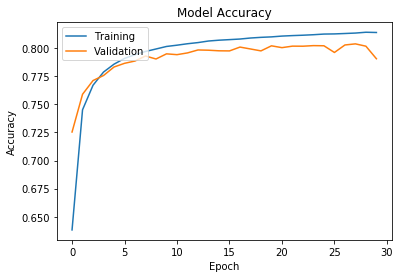

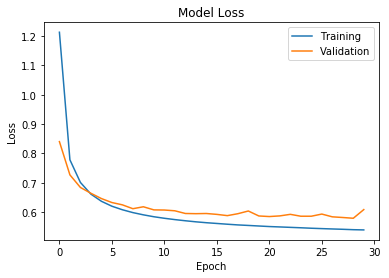

In [15]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [16]:
#model.save('models/conv32_3_3_pool2_2_2_conv64_3_3_pool_2_2_64dense_77acc.h5')